In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import qgrid
import seaborn as sns

In [3]:
files = {"all": "../../explanations-for-ner-train-finnish-20190114-total.txt",
        "only_target_entities": "../../explanations-for-ner-train-finnish-20190115-total-only_target_entities.txt",
        "finnish_model_10_size": {"explanations": "../../explanations-for-ner-train-finnish_model_10_size.txt",
                                   "raw_data": "../../regression-data-for-ner-train-finnish_model_10_size.txt"},
        "finnish_model_100_size": {"explanations": "explanations-for-ner-train-finnish_model_100_size.txt",
                                   "raw_data": ""}, 
        "turkish_model_100_size": "explanations-for-ner-train-turkish_model_100_size.txt"}

In [1]:
%ls ../../regression-data-for-ner-train-finnish_model_10_size.txt

Explanations Analysis Run 01.ipynb
Explanations Analysis Run 02 - Finnish - Probs Analysis 20190203.ipynb
Explanations Analysis Run 02 - Finnish.ipynb
Explanations Analysis Run 02 - Turkish.ipynb
__init__.py
__pycache__/
explanations-for-ner-train-finnish_model_100_size.txt
explanations-for-ner-train-turkish_model_100_size.txt
main.py
run-01/


In [54]:
lines = []
records = []
with open(files["finnish_model_10_size"]["explanations"], "r") as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.strip().split("\t")
        record = [int(tokens[0]), tokens[1], tuple([int(x) for x in tokens[2].split(" ")])]
        record.append({k: float(v) for k, v in [tuple(x.split(" ")) for x in tokens[3:]]})
        records.append(record)

In [55]:
records[0]

[2,
 'ORG',
 (7, 8),
 {'Number=Sing': 0.0067969213833812625,
  'Case=Nom': -0.006068689085280914,
  'Case=Par': -0.004713344980485142,
  'Mood=Ind': 0.00039847937713356687,
  'Person=3': 0.00039847937713356687,
  '*UNKNOWN*': 0.00039847937713356687,
  'InfForm=1': 0.0003984793771335668,
  'Tense=Pres': 0.00039847937713356676,
  'VerbForm=Inf': 0.00039847937713356676,
  'VerbForm=Fin': 0.0003984793771335667,
  'Voice=Act': 0.00039847937713356665}]

In [6]:
list(record[3].values())

[-0.003332256139114007,
 0.0013446283571978222,
 4.847778010183082e-05,
 4.8477780101830806e-05,
 4.84777801018308e-05,
 4.84777801018308e-05,
 4.847778010183079e-05,
 4.847778010183079e-05,
 4.847778010183079e-05,
 4.8477780101830786e-05,
 4.847778010183078e-05,
 4.847778010183078e-05,
 4.847778010183078e-05,
 4.847778010183077e-05,
 4.847778010183077e-05,
 4.847778010183077e-05,
 4.8477780101830766e-05,
 4.8477780101830766e-05,
 4.847778010183076e-05,
 4.847778010183076e-05,
 4.847778010183076e-05,
 4.847778010183076e-05,
 4.847778010183076e-05,
 4.847778010183075e-05,
 4.847778010183075e-05,
 4.847778010183075e-05,
 4.8477780101830745e-05,
 4.8477780101830745e-05,
 4.8477780101830745e-05,
 4.8477780101830745e-05,
 4.847778010183074e-05,
 4.847778010183074e-05,
 4.847778010183074e-05,
 4.847778010183074e-05,
 4.847778010183074e-05,
 4.847778010183073e-05,
 4.8477780101830725e-05,
 4.847778010183072e-05,
 4.8477780101830705e-05,
 4.8477780101830705e-05,
 4.8477780101830705e-05]

In [7]:
def log_sum_exp(input_x):
    max_value = np.max(input_x)
    return np.log(np.sum([np.exp(x-max_value) for x in input_x])) + max_value

log_sum_exp([1, 2])

2.313261687518223

In [8]:
np.logaddexp(*[1, 2])

2.313261687518223

In [9]:
group_by_entity_type = {}
for record in records:
    entity_type = record[1]
    if entity_type not in group_by_entity_type:
        group_by_entity_type[entity_type] = {}
    if entity_type in group_by_entity_type:
        # sum_weights = log_sum_exp(list(record[3].values()))
#         min_value = np.min(list(record[3].values()))
#         max_value = np.max(list(record[3].values()))
        for morpho_tag, weight in record[3].items():
#             value = np.exp(weight - sum_weights)
#             value = (weight-min_value)/float(max_value-min_value)
            value = weight
            if morpho_tag in group_by_entity_type[entity_type]:
                group_by_entity_type[entity_type][morpho_tag].append(value)
            else:
                group_by_entity_type[entity_type][morpho_tag] = [value]

In [10]:
group_by_entity_type.keys()

dict_keys(['ORG', 'TIT', 'PER', 'TIM', 'LOC', 'DATE', 'PRO', 'MISC', 'EVENT', 'OUTSIDE'])

In [11]:
group_by_entity_type['ORG'].keys()

dict_keys(['Case=Nom', 'Number=Sing', 'Mood=Ind', 'VerbForm=Fin', '*UNKNOWN*', 'Number=Plur', 'Case=Ill', 'Derivation=Minen', 'NumType=Card', 'Voice=Act', 'Tense=Pres', 'Person=0', 'Case=Ins', 'Degree=Sup', 'Person=3', 'Style=Coll', 'InfForm=1', 'Derivation=Lainen', 'Case=Par', 'PartForm=Past', 'Degree=Pos', 'VerbForm=Part', 'VerbForm=Inf', 'Case=Gen', 'Mood=Imp', 'Derivation=Vs', 'Case=Ess', 'Foreign=Yes', 'Case=Ela', 'Person=2', 'PronType=Prs', 'Person[psor]=3', 'Tense=Past', 'Voice=Pass', 'Person=1', 'Case=Ade', 'Connegative=Yes', 'PartForm=Agt', 'PronType=Ind', 'Typo=Yes', 'Case=Ine', 'PartForm=Pres', 'AdpType=Post', 'Case=Tra', 'InfForm=2', 'NumType=Ord', 'PronType=Rel', 'Number[psor]=Sing', 'Derivation=Sti', 'Person[psor]=2', 'Case=All', 'AdpType=Prep', 'InfForm=3', 'Clitic=Kaan', 'Degree=Cmp', 'Polarity=Neg', 'PronType=Dem', 'Abbr=Yes', 'Derivation=Inen', 'Case=Abl', 'Person[psor]=1', 'Number[psor]=Plur', 'Clitic=Ko', 'Derivation=Ttain', 'Clitic=S', 'Clitic=Pa,S', 'Mood=Cnd', 'D

In [12]:
stats_by_entity_type = {key: dict() for key in group_by_entity_type.keys()}
for entity_type in stats_by_entity_type.keys():
    for morpho_tag in group_by_entity_type[entity_type]:
        l = group_by_entity_type[entity_type][morpho_tag]
        stats_by_entity_type[entity_type][morpho_tag] = (np.mean(l), len(l))

In [13]:
for entity_type in stats_by_entity_type.keys():
    sorted_l = sorted(stats_by_entity_type[entity_type].items(), key=lambda x: np.abs(x[1][0]), reverse=True)
    print(entity_type, sorted_l[:10])

ORG [('Number=Sing', (-0.0018243359673803037, 9101)), ('Case=Nom', (-0.00169143605762386, 9099)), ('Clitic=Kin', (0.0007266414128715322, 862)), ('Case=Ade', (-0.000664262656997685, 2473)), ('Derivation=U', (0.00023974709551593116, 34)), ('Mood=Cnd', (-0.00022722570713425461, 844)), ('Polarity=Neg', (0.0002257937713159162, 1638)), ('Derivation=Ttain', (0.0002093495640021931, 70)), ('Case=Gen', (0.00020420728950180283, 8722)), ('Derivation=Ja', (0.0002039334789717421, 258))]
TIT [('Number=Sing', (0.020895782766916414, 631)), ('Case=Nom', (0.008101013736644323, 631)), ('Case=Abl', (-0.002264198947223181, 44)), ('Case=Par', (-0.001416601741647547, 575)), ('*UNKNOWN*', (-0.0013867442428477895, 631)), ('Case=Com', (-0.0013723381114265011, 2)), ('Person[psor]=2', (-0.0012657431726888217, 40)), ('Reflex=Yes', (-0.0012464186747703544, 32)), ('Number=Plur', (-0.0011238883528869367, 617)), ('Number[psor]=Sing', (-0.001092229559817878, 54))]
PER [('Clitic=Ko,S', (-0.013427603525183102, 7)), ('Numb

In [14]:
all_morpho_tags = set()
for record in records:
    all_morpho_tags.update(set(record[3].keys()))
all_morpho_tags
morpho_tag_to_id = {m: idx for idx, m in enumerate(all_morpho_tags)}
morpho_tag_to_id

{'Derivation=Ja': 0,
 'Case=Gen': 1,
 '*UNKNOWN*': 2,
 'Case=Ill': 3,
 'Tense=Pres': 4,
 'Mood=Imp': 5,
 'Connegative=Yes': 6,
 'Case=Abe': 7,
 'Case=Acc': 8,
 'Clitic=Han,Ko': 9,
 'Case=Ine': 10,
 'Abbr=Yes': 11,
 'Case=Nom': 12,
 'Derivation=Vs': 13,
 'Number=Sing': 14,
 'Case=Ess': 15,
 'Person[psor]=2': 16,
 'VerbForm=Inf': 17,
 'PronType=Int': 18,
 'PartForm=Agt': 19,
 'Polarity=Neg': 20,
 'InfForm=1': 21,
 'AdpType=Prep': 22,
 'Clitic=Han': 23,
 'Case=Abl': 24,
 'Case=Ins': 25,
 'Person=0': 26,
 'Person=3': 27,
 'PronType=Rel': 28,
 'Derivation=Minen': 29,
 'Person[psor]=3': 30,
 'Mood=Cnd': 31,
 'Case=Com': 32,
 'Number=Plur': 33,
 'Person=2': 34,
 'Clitic=Kin': 35,
 'Case=All': 36,
 'PartForm=Past': 37,
 'Voice=Pass': 38,
 'PronType=Dem': 39,
 'Degree=Cmp': 40,
 'PronType=Rcp': 41,
 'Style=Arch': 42,
 'Person[psor]=1': 43,
 'AdpType=Post': 44,
 'Typo=Yes': 45,
 'Tense=Past': 46,
 'Clitic=Kaan': 47,
 'Person=1': 48,
 'Voice=Act': 49,
 'Case=Ela': 50,
 'PartForm=Neg': 51,
 'Cliti

In [15]:
record

[15434,
 'LOC',
 (13, 14),
 {'Number=Sing': -0.003332256139114007,
  'Case=Gen': 0.0013446283571978222,
  'PartForm=Past': 4.847778010183082e-05,
  'VerbForm=Inf': 4.8477780101830806e-05,
  'Person=3': 4.84777801018308e-05,
  'Person=2': 4.84777801018308e-05,
  'Style=Coll': 4.847778010183079e-05,
  'VerbForm=Part': 4.847778010183079e-05,
  'Connegative=Yes': 4.847778010183079e-05,
  'Person=1': 4.8477780101830786e-05,
  'Person=0': 4.847778010183078e-05,
  'Person[psor]=3': 4.847778010183078e-05,
  'PronType=Dem': 4.847778010183078e-05,
  'Case=Par': 4.847778010183077e-05,
  'Tense=Past': 4.847778010183077e-05,
  'Mood=Cnd': 4.847778010183077e-05,
  'Case=Ill': 4.8477780101830766e-05,
  'Voice=Pass': 4.8477780101830766e-05,
  'VerbForm=Fin': 4.847778010183076e-05,
  'Tense=Pres': 4.847778010183076e-05,
  'InfForm=1': 4.847778010183076e-05,
  'Derivation=Minen': 4.847778010183076e-05,
  'InfForm=2': 4.847778010183076e-05,
  'Mood=Ind': 4.847778010183075e-05,
  'Number=Plur': 4.84777801

In [16]:
records_for_panda = []
for record in records:
    record_pre_panda = [record[0], record[1], record[2][0], record[2][1]]
    morpho_tags = [None] * len(morpho_tag_to_id)
    for morpho_tag, idx in morpho_tag_to_id.items():
        if morpho_tag in record[3]:
            morpho_tags[idx] = record[3][morpho_tag]
    record_pre_panda += morpho_tags
    records_for_panda.append(record_pre_panda)
#     print(record_pre_panda)

In [17]:
id_to_morpho_tag = {idx: morpho_tag for morpho_tag, idx in morpho_tag_to_id.items()}
column_names = ['sentence_idx', 'entity_type', 'entity_start', 'entity_end']
column_names += [id_to_morpho_tag[x] for x in range(len(morpho_tag_to_id))]
explanations = pd.DataFrame(records_for_panda, columns=column_names)

In [18]:
explanations

,sentence_idx,entity_type,entity_start,entity_end,Derivation=Ja,Case=Gen,*UNKNOWN*,Case=Ill,Tense=Pres,Mood=Imp,...,"Clitic=Pa,S",Mood=Pot,InfForm=3,Style=Coll,Derivation=Ttain,PartForm=Pres,VerbForm=Part,Case=Tra,Clitic=S,PronType=Ind
0,2,ORG,7,8,NaN,0.000619,6.191767e-04,6.191767e-04,6.191767e-04,NaN,...,NaN,NaN,NaN,6.191767e-04,NaN,NaN,6.191767e-04,NaN,NaN,NaN
1,2,ORG,15,16,NaN,0.001085,1.085237e-03,-1.955933e-02,1.085237e-03,NaN,...,NaN,NaN,NaN,1.085237e-03,NaN,NaN,1.085237e-03,NaN,NaN,NaN
2,3,ORG,1,2,NaN,-0.000007,5.432239e-07,5.432239e-07,5.432239e-07,5.432239e-07,...,NaN,NaN,NaN,5.432239e-07,NaN,NaN,5.432239e-07,NaN,NaN,NaN
3,3,TIT,2,3,NaN,-0.000874,-8.744889e-04,-8.744889e-04,-8.744889e-04,-8.744889e-04,...,NaN,NaN,NaN,-8.744889e-04,NaN,NaN,-8.744889e-04,NaN,NaN,NaN
4,3,TIT,4,5,NaN,-0.000302,-3.022270e-04,-3.022270e-04,-3.022270e-04,-3.022270e-04,...,NaN,NaN,NaN,-3.022270e-04,NaN,NaN,-3.022270e-04,NaN,NaN,NaN
5,3,PER,5,7,NaN,0.000173,1.730456e-04,1.730456e-04,1.730456e-04,1.730456e-04,...,NaN,NaN,NaN,1.730456e-04,NaN,NaN,1.730456e-04,NaN,NaN,NaN
6,3,TIM,8,9,NaN,0.000051,5.131101e-05,5.131101e-05,5.131101e-05,5.131101e-05,...,NaN,NaN,NaN,5.131101e-05,NaN,NaN,5.131101e-05,NaN,NaN,NaN
7,3,ORG,12,13,NaN,0.000057,5.709021e-05,5.709021e-05,5.709021e-05,5.709021e-05,...,NaN,NaN,NaN,5.709021e-05,NaN,NaN,5.709021e-05,NaN,NaN,NaN
8,5,ORG,0,1,NaN,0.010291,-4.173099e-04,-4.173099e-04,-4.173099e-04,NaN,...,NaN,NaN,NaN,-4.173099e-04,NaN,NaN,-4.173099e-04,NaN,NaN,NaN
9,5,ORG,5,6,NaN,-0.000266,1.782648e-05,1.782648e-05,1.782648e-05,NaN,...,NaN,NaN,NaN,1.782648e-05,NaN,NaN,1.782648e-05,NaN,NaN,NaN


In [19]:
df_by_entity_type = explanations.groupby('entity_type')

In [20]:
explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type').mean()

,Derivation=Ja,Case=Gen,*UNKNOWN*,Case=Ill,Tense=Pres,Mood=Imp,Connegative=Yes,Case=Abe,Case=Acc,"Clitic=Han,Ko",...,"Clitic=Pa,S",Mood=Pot,InfForm=3,Style=Coll,Derivation=Ttain,PartForm=Pres,VerbForm=Part,Case=Tra,Clitic=S,PronType=Ind
entity_type,,,,,,,,,,,,,,,,,,,,,
DATE,-0.000223,0.000401,-0.000176,-0.000069,-0.000016,-0.000037,-0.000013,-1.029644e-06,-1.516961e-07,NaN,...,0.000002,0.000002,6.623958e-06,-0.000025,4.449420e-09,-4.033870e-06,0.000018,3.971373e-07,1.759956e-05,-0.000006
EVENT,-0.000135,-0.000925,0.000296,0.000126,0.000373,0.000231,0.000288,1.628979e-08,NaN,NaN,...,NaN,0.000095,1.703617e-04,0.000334,-3.116625e-05,3.958603e-04,0.000313,4.686970e-04,6.750580e-05,0.000141
LOC,-0.000102,0.001760,0.000330,0.000703,-0.000065,0.000069,-0.000167,-6.677630e-05,-2.674342e-04,7.177432e-08,...,-0.000103,-0.000078,3.558088e-05,-0.000091,1.548821e-04,-2.745437e-05,-0.000061,-4.704977e-05,2.754728e-05,-0.000154
MISC,-0.000171,0.000840,-0.000320,-0.000227,-0.000259,-0.000187,-0.000195,-2.058365e-04,-3.440230e-04,NaN,...,-0.000487,-0.000189,-1.908028e-04,-0.000242,-3.404237e-04,-1.979182e-04,-0.000218,1.096554e-04,-2.057708e-04,-0.000207
ORG,0.000204,0.000204,0.000086,0.000019,0.000147,0.000135,0.000148,1.106348e-04,1.392361e-04,-1.276150e-04,...,0.000134,0.000056,1.273407e-04,0.000170,2.093496e-04,1.407916e-04,0.000127,9.319574e-05,1.044348e-04,0.000156
OUTSIDE,NaN,-0.000038,-0.000039,-0.000048,-0.000039,-0.000083,-0.000065,NaN,NaN,NaN,...,NaN,NaN,9.546602e-08,-0.000039,NaN,3.575530e-06,-0.000048,-1.331659e-05,-8.992892e-09,-0.000010
PER,-0.000098,0.000102,-0.000197,-0.000453,-0.000362,-0.000129,-0.000311,-1.573596e-04,-2.669639e-04,NaN,...,-0.000424,-0.000436,5.199153e-04,-0.000106,-3.580393e-04,-3.275893e-04,-0.000334,-3.633108e-04,-4.144978e-04,-0.000294
PRO,-0.000002,-0.001205,-0.000254,0.000452,-0.000010,-0.000019,0.000001,-2.173940e-05,2.115762e-05,NaN,...,-0.000154,0.000037,-8.196984e-05,0.000166,1.636473e-04,-4.941414e-07,-0.000003,1.437679e-04,1.855918e-05,-0.000005
TIM,-0.000303,-0.000838,0.003747,-0.000185,-0.000229,-0.000085,-0.000181,-1.839055e-04,-1.491066e-04,-4.766429e-04,...,-0.000684,-0.000137,-1.851793e-04,-0.000044,6.105582e-05,-1.846675e-04,-0.000235,3.300368e-04,-1.031575e-04,-0.000389


In [21]:
means_over_entity_type = explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type').mean()

In [22]:
%matplotlib inline

In [23]:
means_over_entity_type.index

Index(['DATE', 'EVENT', 'LOC', 'MISC', 'ORG', 'OUTSIDE', 'PER', 'PRO', 'TIM',
       'TIT'],
      dtype='object', name='entity_type')

In [24]:
means_over_entity_type.corr()

,Derivation=Ja,Case=Gen,*UNKNOWN*,Case=Ill,Tense=Pres,Mood=Imp,Connegative=Yes,Case=Abe,Case=Acc,"Clitic=Han,Ko",...,"Clitic=Pa,S",Mood=Pot,InfForm=3,Style=Coll,Derivation=Ttain,PartForm=Pres,VerbForm=Part,Case=Tra,Clitic=S,PronType=Ind
Derivation=Ja,1.000000,0.298519,0.115320,0.638788,0.784253,0.850801,0.802543,0.802349,0.843180,0.618185,...,0.686967,0.702508,0.743825,0.837602,0.709380,0.782442,0.796950,0.624688,0.783325,0.870061
Case=Gen,0.298519,1.000000,-0.123268,0.339176,0.104144,0.232570,0.049077,0.118654,0.047789,0.930293,...,0.265003,0.062824,0.280874,-0.009872,0.122110,0.126684,0.138320,-0.009752,0.221258,0.179102
*UNKNOWN*,0.115320,-0.123268,1.000000,0.168720,0.230702,0.348240,0.251647,-0.003185,0.309730,-0.948842,...,-0.587770,0.270698,0.106003,0.345126,0.442193,0.252836,0.212328,0.579933,0.336095,0.039116
Case=Ill,0.638788,0.339176,0.168720,1.000000,0.710751,0.744939,0.647245,0.636210,0.575788,0.845300,...,0.489060,0.768489,0.340560,0.671395,0.834074,0.713390,0.718351,0.608040,0.809905,0.666663
Tense=Pres,0.784253,0.104144,0.230702,0.710751,1.000000,0.958517,0.990166,0.863647,0.936147,0.653670,...,0.868156,0.936671,0.603603,0.952873,0.776688,0.998153,0.997839,0.859365,0.936972,0.957638
Mood=Imp,0.850801,0.232570,0.348240,0.744939,0.958517,1.000000,0.945518,0.814711,0.878290,0.848745,...,0.794396,0.864079,0.733675,0.961434,0.797815,0.962662,0.959190,0.850249,0.914030,0.906341
Connegative=Yes,0.802543,0.049077,0.251647,0.647245,0.990166,0.945518,1.000000,0.857209,0.960985,0.294113,...,0.775464,0.933437,0.603068,0.963528,0.756241,0.987796,0.990432,0.880117,0.925046,0.961133
Case=Abe,0.802349,0.118654,-0.003185,0.636210,0.863647,0.814711,0.857209,1.000000,0.896600,0.619331,...,0.937328,0.849364,0.540922,0.813141,0.803290,0.836760,0.867666,0.561354,0.846721,0.915574
Case=Acc,0.843180,0.047789,0.309730,0.575788,0.936147,0.878290,0.960985,0.896600,1.000000,-0.024847,...,0.669809,0.885133,0.573220,0.949133,0.843627,0.919913,0.929812,0.768970,0.888498,0.917780
"Clitic=Han,Ko",0.618185,0.930293,-0.948842,0.845300,0.653670,0.848745,0.294113,0.619331,-0.024847,1.000000,...,0.854447,0.534618,0.851825,0.090750,0.806117,0.693214,0.692040,-0.993386,0.804052,0.649235


In [25]:
means_over_entity_type['Ins^DB'].mean()

KeyError: 'Ins^DB'

In [26]:
means_over_entity_type[means_over_entity_type.columns[0]].mean()

-0.00017540515365888843

In [27]:
explanations_grid = qgrid.show_grid(means_over_entity_type.corr().iloc[:, 0:2], show_toolbar=True)
explanations_grid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [28]:
df_by_entity_type = explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type')

In [29]:
explanations[explanations['entity_type'] == "LOC"]

,sentence_idx,entity_type,entity_start,entity_end,Derivation=Ja,Case=Gen,*UNKNOWN*,Case=Ill,Tense=Pres,Mood=Imp,...,"Clitic=Pa,S",Mood=Pot,InfForm=3,Style=Coll,Derivation=Ttain,PartForm=Pres,VerbForm=Part,Case=Tra,Clitic=S,PronType=Ind
14,7,LOC,7,8,NaN,-0.000017,0.000040,3.973426e-05,3.973426e-05,0.000040,...,NaN,NaN,NaN,3.973426e-05,NaN,0.000040,3.973426e-05,0.000040,NaN,NaN
28,11,LOC,4,5,NaN,0.000047,0.000038,3.811773e-05,3.811773e-05,NaN,...,NaN,NaN,NaN,3.811773e-05,NaN,NaN,3.811773e-05,0.000038,NaN,0.000038
94,44,LOC,5,6,NaN,-0.000016,-0.000012,-1.219126e-05,-1.219126e-05,-0.000012,...,NaN,NaN,NaN,-1.219126e-05,NaN,NaN,NaN,NaN,NaN,-0.000012
143,65,LOC,1,2,NaN,0.000436,-0.000061,NaN,-6.121374e-05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-6.121374e-05,NaN,NaN,NaN
162,76,LOC,1,2,NaN,-0.000046,-0.000046,NaN,-4.561658e-05,NaN,...,NaN,NaN,NaN,-4.561658e-05,NaN,NaN,NaN,-0.000046,NaN,-0.000046
163,76,LOC,8,9,NaN,-0.003308,-0.003308,NaN,-3.307737e-03,NaN,...,NaN,NaN,NaN,-3.307737e-03,NaN,NaN,NaN,-0.003308,NaN,-0.003308
164,78,LOC,4,5,NaN,-0.000023,-0.000023,-2.308024e-05,-2.308024e-05,NaN,...,NaN,NaN,-0.000023,-2.308024e-05,NaN,-0.000023,-2.308024e-05,NaN,NaN,NaN
166,79,LOC,3,4,NaN,-0.000043,-0.000043,-4.290041e-05,-4.290041e-05,NaN,...,NaN,NaN,NaN,-4.290041e-05,NaN,NaN,-4.290041e-05,-0.000043,NaN,-0.000043
168,79,LOC,13,14,NaN,-0.000024,-0.000024,-2.372364e-05,-2.372364e-05,NaN,...,NaN,NaN,NaN,-2.372364e-05,NaN,NaN,-2.372364e-05,-0.000024,NaN,-0.000024
169,80,LOC,1,2,NaN,0.000410,0.000102,1.024827e-04,1.024827e-04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# LOC type entities - analysis

In [40]:
loc_group_explanations = explanations[explanations['entity_type'] == "LOC"].drop(["sentence_idx", "entity_type", "entity_start", "entity_end"], axis=1)

In [42]:
loc_group_explanations.columns

Index(['NumType=Card', 'VerbForm=Inf', 'Clitic=S', 'PronType=Rcp', 'Case=Ela',
       'Number=Plur', 'Typo=Yes', 'Clitic=Ko,S', 'Person=1',
       'Number[psor]=Plur', 'PartForm=Agt', 'Clitic=Ko', 'Person[psor]=1',
       'Clitic=Kin', 'Case=Acc', 'PartForm=Past', 'Degree=Sup', 'AdpType=Post',
       'Derivation=Lainen', 'Mood=Pot', 'Derivation=Vs', 'Mood=Cnd',
       'Person=3', 'Reflex=Yes', 'Clitic=Pa', 'Case=Tra', 'Degree=Cmp',
       'PronType=Int', 'Person=0', 'Derivation=Ton', 'Mood=Imp', 'InfForm=2',
       'PronType=Prs', 'Derivation=Sti', 'Case=Ade', 'VerbForm=Part',
       'Derivation=Inen', 'PartForm=Neg', 'Voice=Pass', 'PronType=Ind',
       'Derivation=U', 'Derivation=Ttain', 'Derivation=Minen',
       'Connegative=Yes', 'Style=Coll', 'Case=Par', 'Polarity=Neg',
       'NumType=Ord', 'Clitic=Kaan', 'Case=Com', 'Abbr=Yes', 'PronType=Dem',
       'Clitic=Han,Ko', 'Clitic=Ka', 'VerbForm=Fin', 'Case=Ill', 'InfForm=3',
       'Person[psor]=3', 'Style=Arch', 'Number[psor]=Sing'

In [41]:
loc_group_explanations['Loc'].clip(lower=-1.0, upper=1, inplace=False)

KeyError: 'Loc'

In [43]:
len(morpho_tag_to_id)

85

In [44]:
loc_group_explanations.size

173400

PresPart^DB
21      -0.008587
24      -0.009110
73      -0.003479
74      -0.000344
147      0.004382
149     -0.002825
168     -0.000391
171     -0.000023
172     -0.000043
175     -0.000079
187     -0.000077
395     -0.000099
606     -0.001537
671     -0.000017
816     -0.000031
817     -0.000114
897     -0.000120
902     -0.000255
904     -0.000944
907     -0.000052
908     -0.000017
909     -0.000082
1074    -0.005958
1116    -0.001389
1195     0.000002
1199    -0.000074
1309     0.000049
1342    -0.000147
1343    -0.000311
1573    -0.001537
           ...   
20566   -0.000271
20598   -0.004956
20599   -0.000125
20672   -0.002027
20844   -0.000048
21064   -0.000147
21065   -0.000190
21066    0.000126
21073   -0.000319
21074    0.000190
21145   -0.002429
21388   -0.005242
21396    0.000023
21478   -0.000811
21480   -0.002993
21561   -0.000265
21566   -0.000009
21739   -0.000761
21896   -0.000319
21901   -0.000012
21906   -0.002408
21966    0.000051
21969    0.000132
21970   -0.00020

ValueError: `dataset` input should have multiple elements.

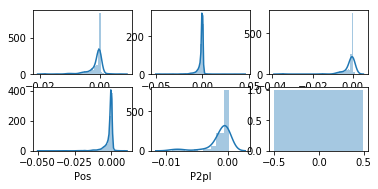

In [35]:
for idx, morpho_tag in enumerate(list(morpho_tag_to_id.keys())):
    if idx % 9 == 0:
        fig = plt.figure(int(idx/9))
    rem = idx % 9
    plt.subplot(3, 3, rem+1)
    print(morpho_tag)
#     sns.violinplot(data=list(loc_group_explanations[morpho_tag].clip(lower=-0.5, upper=0.5)))
    data = loc_group_explanations[morpho_tag].dropna().clip(lower=-0.5, upper=0.5)
    print(data)
    if data.size > 0:
        sns.distplot(data)
plt.show()

In [36]:
loc_group_explanations

,PresPart^DB,Acc,Real,Pos,P2pl,Stay^DB,Dim,Imp,PCGen,Pos^DB,...,Stay,NotState,Real^DB,Loc^DB,Pers,Ratio,Ins,Recip,Prop,PersP
1,NaN,-0.000343,NaN,-0.000343,NaN,NaN,NaN,-0.000343,NaN,-0.000343,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.000343,NaN,0.011976,NaN
2,NaN,0.000100,NaN,0.000100,NaN,NaN,NaN,0.000100,NaN,0.000100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000027,NaN
3,NaN,-0.018088,NaN,-0.018088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211969,NaN
5,NaN,-0.000048,NaN,-0.000048,NaN,NaN,NaN,NaN,NaN,-0.000048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001386,NaN
6,NaN,-0.000050,NaN,-0.000050,NaN,NaN,NaN,NaN,NaN,-0.000050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001713,NaN
7,NaN,-0.001368,NaN,-0.001368,NaN,NaN,NaN,NaN,NaN,-0.001368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042216,NaN
8,NaN,-0.000158,NaN,-0.000158,NaN,NaN,NaN,NaN,NaN,-0.000158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004216,NaN
9,NaN,-0.000837,NaN,-0.000837,NaN,NaN,NaN,NaN,NaN,-0.000837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025421,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001784,NaN
15,NaN,-0.008288,NaN,-0.008288,NaN,NaN,NaN,NaN,NaN,-0.008288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116027,NaN


In [45]:
mean_loc_group_explanations = loc_group_explanations.mean()

In [46]:
mean_loc_group_explanations.sort_values(ascending=False)

Clitic=Han           0.014738
Case=Ine             0.003041
Case=Ela             0.002016
Case=Gen             0.001760
Case=Ade             0.001099
Case=Ill             0.000703
Case=All             0.000543
Clitic=Ka            0.000339
*UNKNOWN*            0.000330
Case=Par             0.000263
Degree=Sup           0.000214
Clitic=Pa            0.000169
AdpType=Post         0.000164
Derivation=Ttain     0.000155
Derivation=Ton       0.000150
Degree=Cmp           0.000134
Number[psor]=Sing    0.000121
Number=Plur          0.000114
Clitic=Ko            0.000113
Person[psor]=3       0.000093
PronType=Dem         0.000081
Mood=Imp             0.000069
PronType=Rel         0.000062
Person=2             0.000047
Derivation=Inen      0.000041
InfForm=3            0.000036
Polarity=Neg         0.000030
Clitic=S             0.000028
InfForm=2            0.000026
Foreign=Yes          0.000025
                       ...   
Tense=Pres          -0.000065
Case=Abe            -0.000067
VerbForm=F

In [39]:
loc_group_explanations['Loc'].sort_values()[:10]

5354    -0.053045
19424   -0.048364
16613   -0.046426
10436   -0.041370
6503    -0.037810
13573   -0.035518
18812   -0.033537
8799    -0.031651
2068    -0.021226
18643   -0.020892
Name: Loc, dtype: float64

In [40]:
loc_group_explanations['Loc'].sort_values(ascending=False)[:10]

12190    0.226137
12468    0.209549
14743    0.180590
16771    0.180451
17499    0.180451
10319    0.173254
1665     0.133967
7508     0.130966
17138    0.104637
20407    0.102134
Name: Loc, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cf90da0>]],
      dtype=object)

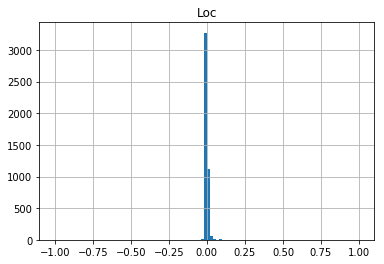

In [43]:
loc_group_explanations.hist(['Loc'], range=[-1, 1], bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cf99a20>]],
      dtype=object)

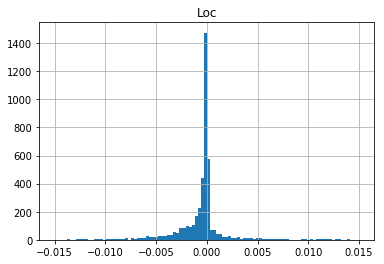

In [48]:
loc_group_explanations.hist(['Loc'], range=[-0.015, 0.015], bins=100)

In [69]:
loc_group_explanations['Loc'].value_counts().sort_values(ascending=False)

 3.864043e-03    4
 3.241734e-03    4
-6.119342e-05    2
 4.310615e-05    2
 1.375757e-03    2
-2.785775e-05    2
-2.118100e-04    2
-8.958014e-05    2
-2.183714e-04    2
-1.748451e-02    2
-1.612431e-03    2
 3.942213e-06    2
-2.728251e-04    2
-1.005967e-03    2
-2.521092e-04    2
 2.118214e-03    2
-2.226804e-04    2
 2.173822e-03    2
-4.444699e-05    2
 3.033458e-02    2
 1.654812e-03    2
-2.588910e-04    2
-5.718875e-04    2
-6.772747e-03    2
 2.133256e-06    2
-1.027175e-04    2
-1.022416e-05    2
-3.105809e-03    2
-1.257856e-03    2
-2.895252e-05    2
                ..
 6.254161e-04    1
-5.556325e-04    1
-5.914780e-04    1
-5.344973e-05    1
-1.257218e-03    1
-2.117192e-04    1
-7.002296e-03    1
-1.156744e-03    1
-8.145127e-05    1
 8.828563e-07    1
 4.090527e-03    1
-3.560898e-04    1
-1.426425e-04    1
-9.808047e-05    1
-2.792476e-04    1
-1.973418e-04    1
 5.126086e-04    1
-3.209276e-04    1
 1.009438e-04    1
 6.148742e-04    1
-4.598454e-05    1
 9.757987e-0

In [75]:
[(loc_group_explanations['Loc'][loc_group_explanations['Loc'] < 0]).mean(),
  (loc_group_explanations['Loc'][loc_group_explanations['Loc'] >= 0]).mean()]

[-0.001482690620947343, 0.005616132062326875]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124e40f28>]],
      dtype=object)

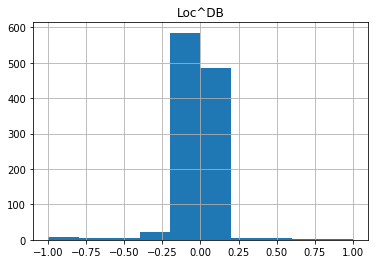

In [41]:
loc_group_explanations.hist(['Loc^DB'], range=[-1, 1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ce8a0b8>]],
      dtype=object)

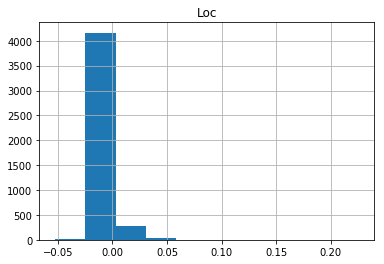

In [42]:
loc_group_explanations.hist(['Loc'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12502c320>]],
      dtype=object)

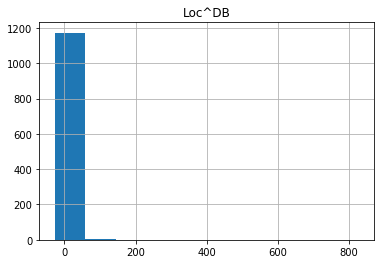

In [43]:
loc_group_explanations.hist(['Loc^DB'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12506ea20>]],
      dtype=object)

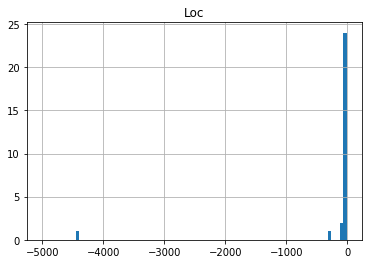

In [44]:
loc_group_explanations.hist(['Loc'], range=[-5000, -10], bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125021c88>]],
      dtype=object)

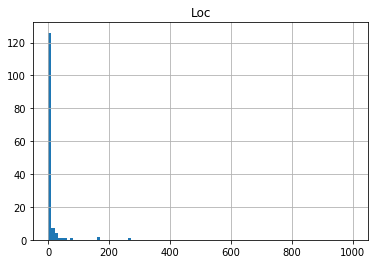

In [45]:
loc_group_explanations.hist(['Loc'], range=[1, 1000], bins=100)

In [46]:
loc_group_explanations['Loc'][loc_group_explanations['Loc'] < 0].count()

2681

In [47]:
loc_group_explanations['Loc'][loc_group_explanations['Loc'] >= 0].count()

1818

In [57]:
for morpho_tag in ['Loc', 'Loc^DB']:
    below_zero = loc_group_explanations[morpho_tag][loc_group_explanations[morpho_tag] < 0].count()
    above_zero = loc_group_explanations[morpho_tag][loc_group_explanations[morpho_tag] >= 0].count()
    print(morpho_tag, below_zero, above_zero)

Loc 2681 1818
Loc^DB 653 523


# ORG type entities - analysis

In [47]:
org_group_explanations = explanations[explanations['entity_type'] == "ORG"].drop(["sentence_idx", "entity_type", "entity_start", "entity_end"], axis=1)

In [48]:
org_group_explanations.mean().sort_values(ascending=False)

Clitic=Kin           0.000727
Derivation=U         0.000240
Polarity=Neg         0.000226
Derivation=Ttain     0.000209
Case=Gen             0.000204
Derivation=Ja        0.000204
Person=3             0.000201
Clitic=Kaan          0.000199
Number[psor]=Sing    0.000184
Case=All             0.000176
Person[psor]=1       0.000171
Style=Coll           0.000170
Typo=Yes             0.000169
Derivation=Ton       0.000167
Foreign=Yes          0.000164
NumType=Card         0.000158
Degree=Pos           0.000158
Number[psor]=Plur    0.000158
PronType=Ind         0.000156
Tense=Past           0.000155
Derivation=Inen      0.000153
Voice=Act            0.000153
Mood=Ind             0.000152
Person=0             0.000149
Person[psor]=2       0.000149
Derivation=Lainen    0.000148
Connegative=Yes      0.000148
Tense=Pres           0.000147
Reflex=Yes           0.000146
AdpType=Post         0.000144
                       ...   
Clitic=Ko,S          0.000109
InfForm=2            0.000107
Derivation

# PER type entities - analysis

In [49]:
per_group_explanations = explanations[explanations['entity_type'] == "PER"].drop(["sentence_idx", "entity_type", "entity_start", "entity_end"], axis=1)

In [50]:
per_group_explanations.mean().sort_values(ascending=False)

Number=Sing          0.007034
Case=Nom             0.003130
InfForm=3            0.000520
Case=Gen             0.000102
Clitic=Han          -0.000024
Derivation=Ja       -0.000098
Style=Coll          -0.000106
Mood=Imp            -0.000129
Case=Abe            -0.000157
Degree=Pos          -0.000176
Abbr=Yes            -0.000189
*UNKNOWN*           -0.000197
Derivation=Ton      -0.000212
InfForm=2           -0.000229
PronType=Prs        -0.000234
PronType=Rcp        -0.000236
PartForm=Neg        -0.000239
Clitic=Kin          -0.000260
Foreign=Yes         -0.000261
Derivation=Inen     -0.000265
VerbForm=Inf        -0.000265
Mood=Ind            -0.000265
Case=Acc            -0.000267
VerbForm=Fin        -0.000274
AdpType=Prep        -0.000282
Person=1            -0.000286
Typo=Yes            -0.000294
PronType=Ind        -0.000294
Derivation=Lainen   -0.000296
Person=2            -0.000298
                       ...   
Clitic=Pa           -0.000353
Mood=Cnd            -0.000355
Derivation

In [ ]:
!pwd

In [ ]:
!ls ../../explanations-for-ner-train-finnish-201901*

In [35]:
tmp = list(range(10))
tmp
np.reshape(tmp, (2, 5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

# Probabilities Analysis

In [73]:
lines = []
raw_data_records = []
with open(files["finnish_model_10_size"]["raw_data"], "r") as f:
    lines = f.readlines()
    for line in lines:
        first_part, second_part, third_part, fourth_part = line.strip().split("\t")
        
        size_x, size_y, *conf_data = [int(float(x)) for x in first_part.split(" ")]
        C = np.reshape(conf_data, (size_x, size_y))
        
        size_x, size_y, *probs_data = [float(x) for x in second_part.split(" ")]
        P = np.reshape(probs_data, (int(size_x), int(size_y)))
        
        target_class_index = int(third_part)
        
        n_morpho_tags, *morpho_tag_ids = [int(x) for x in fourth_part.split(" ")]
        
        record = (C, P, target_class_index, n_morpho_tags, morpho_tag_ids)
        raw_data_records.append(record)

In [74]:
raw_data_records[0]

(array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]),
 array([[1.026560e-09, 8.784908e-04, 1.333489e-02, 8.998370e-03,
         3.185557e-03, 9.631544e-01, 6.040003e-04, 7.074289e-03,
         5.615072e-04, 1.701601e-03, 5.068746e-04],
        [3.866108e-09, 1.711261e-03, 2.024449e-02, 1.179661e-02,
         3.456799e-03, 9.503524e-01, 9.249952e-04, 7.116442e-03,
         7.859328e-04, 3.227356e-03, 3.837129e-04],
        [5.219055e-10, 5.463981e-04, 9.476880e-03, 6.358055e-03,
         1.536898e-03, 9.760939e-01, 3.108029e-04, 3.

In [42]:
raw_data_records[0][1].sum(axis=1)

array([0.99999998, 1.        , 0.99999997, 0.99999998, 0.99999998,
       0.99999998, 0.99999998, 0.99999998, 1.00000002, 0.99999998,
       0.99999998, 0.99999998])

# single C and P

In [75]:
C = raw_data_records[0][0]
P = raw_data_records[0][1]
target_class_index = raw_data_records[0][2]
n_morpho_tags = raw_data_records[0][3]
morpho_tag_ids_per_sentence = raw_data_records[0][4]

In [68]:
P[:, target_class_index]

array([0.9631544, 0.9503524, 0.9760939, 0.9631544, 0.9631544, 0.9631544,
       0.9631544, 0.9631544, 0.9733822, 0.9631544, 0.9631544, 0.9631544])

In [69]:
C

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])

In [76]:
morpho_tag_ids_per_sentence

[0, 1, 2, 3, 5, 9, 10, 11, 19, 26, 88]

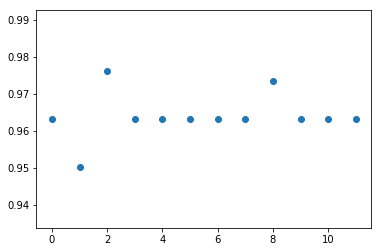

In [52]:
plt.scatter(x=range(0, 12), y=P[:, target_class_index])

In [56]:
records[0]

[2,
 'ORG',
 (7, 8),
 {'Number=Sing': 0.0067969213833812625,
  'Case=Nom': -0.006068689085280914,
  'Case=Par': -0.004713344980485142,
  'Mood=Ind': 0.00039847937713356687,
  'Person=3': 0.00039847937713356687,
  '*UNKNOWN*': 0.00039847937713356687,
  'InfForm=1': 0.0003984793771335668,
  'Tense=Pres': 0.00039847937713356676,
  'VerbForm=Inf': 0.00039847937713356676,
  'VerbForm=Fin': 0.0003984793771335667,
  'Voice=Act': 0.00039847937713356665}]

# all over the file

In [163]:
from collections import defaultdict
zero_centered_Ps = defaultdict(list)
indexed_Cs = defaultdict(list)
for i in range(len(raw_data_records)):
    C = raw_data_records[i][0]
    P = raw_data_records[i][1]
    target_class_index = raw_data_records[i][2]
    n_morpho_tags = raw_data_records[i][3]
    morpho_tag_ids_per_sentence = raw_data_records[i][4]
    target_entity_type = records[i][1]

    unperturbated_configuration = [0]*n_morpho_tags
    for morpho_tag_id in morpho_tag_ids_per_sentence:
        unperturbated_configuration[morpho_tag_id] = 1
    indexed_C = [0]*n_morpho_tags
    for idx in range(len(indexed_C)):
        indexed_C[idx] = list(unperturbated_configuration)
        
    for idx in range(len(indexed_C)):
        for morpho_tag_idx, morpho_tag_id in enumerate(morpho_tag_ids_per_sentence):
            if idx == morpho_tag_id and indexed_C[idx][morpho_tag_id] == 1:
                indexed_C[idx][morpho_tag_id] = -1
    indexed_Cs[target_entity_type] += [np.array(indexed_C)]
    
    zero_centered_P = [0.0]*n_morpho_tags
    for morpho_tag_id, diff_value in zip(morpho_tag_ids_per_sentence, 
                                         list(P[:, target_class_index]-P[0,target_class_index])):
        zero_centered_P[morpho_tag_id] = diff_value
    zero_centered_Ps[target_entity_type] += zero_centered_P
    
for target_entity_type in zero_centered_Ps.keys():
    zero_centered_Ps[target_entity_type] = np.reshape(zero_centered_Ps[target_entity_type], (-1, n_morpho_tags))
    indexed_Cs[target_entity_type] = np.array(indexed_Cs[target_entity_type])

In [147]:
zero_centered_Ps['ORG'][0]

array([ 0.       , -0.012802 ,  0.0129395,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.0102278,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.    

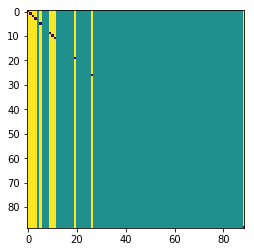

In [164]:
plt.imshow(indexed_Cs['ORG'][0])

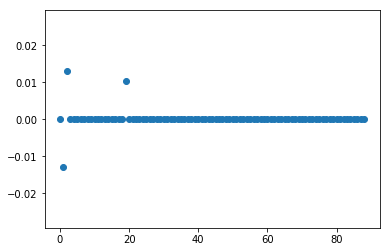

In [167]:
plt.scatter(x=range(n_morpho_tags), y=zero_centered_Ps['ORG'][0])

In [158]:
indexed_Cs['ORG'][0].shape

(89, 89)

In [170]:
len(indexed_Cs['ORG'])

11

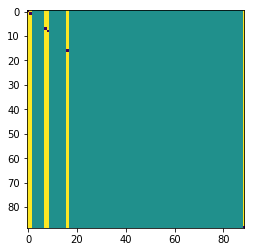

In [168]:
plt.imshow(indexed_Cs['ORG'][1])

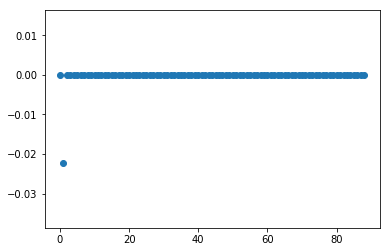

In [169]:
plt.scatter(x=range(n_morpho_tags), y=zero_centered_Ps['ORG'][1])

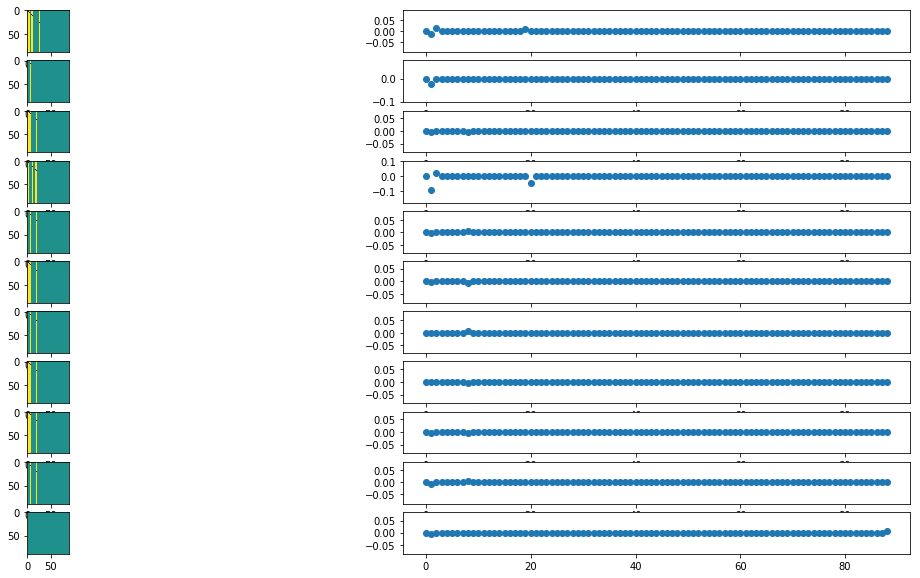

In [190]:
plt.figure(figsize=(20, 10))
for sample_idx in range(len(indexed_Cs['ORG'])):
    plt.subplot(len(indexed_Cs['ORG']), 2, sample_idx*2+1)
    plt.imshow(indexed_Cs['ORG'][sample_idx])
    plt.subplot(len(indexed_Cs['ORG']), 2, sample_idx*2+2)
    plt.scatter(x=range(n_morpho_tags), y=zero_centered_Ps['ORG'][sample_idx])

In [165]:
zero_centered_Ps['ORG'][0].shape

(89,)

In [152]:
indexed_Cs['ORG'][0][0]

array([-1,  1,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1])

In [153]:
indexed_Cs['ORG'][0][1]

array([ 1, -1,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1])

In [154]:
indexed_Cs['ORG'][0][2]

array([ 1,  1, -1,  1,  0,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1])

In [155]:
indexed_Cs['ORG'][0][3]

array([ 1,  1,  1, -1,  0,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1])

In [156]:
indexed_Cs['ORG'][0][4]

array([ 1,  1,  1,  1,  0, -1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1])

In [157]:
indexed_Cs['ORG'][0][5]

array([ 1,  1,  1,  1,  0,  1,  0,  0,  0, -1,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1])

In [162]:
indexed_Cs['ORG'][0][10]

array([ 1,  1,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1])

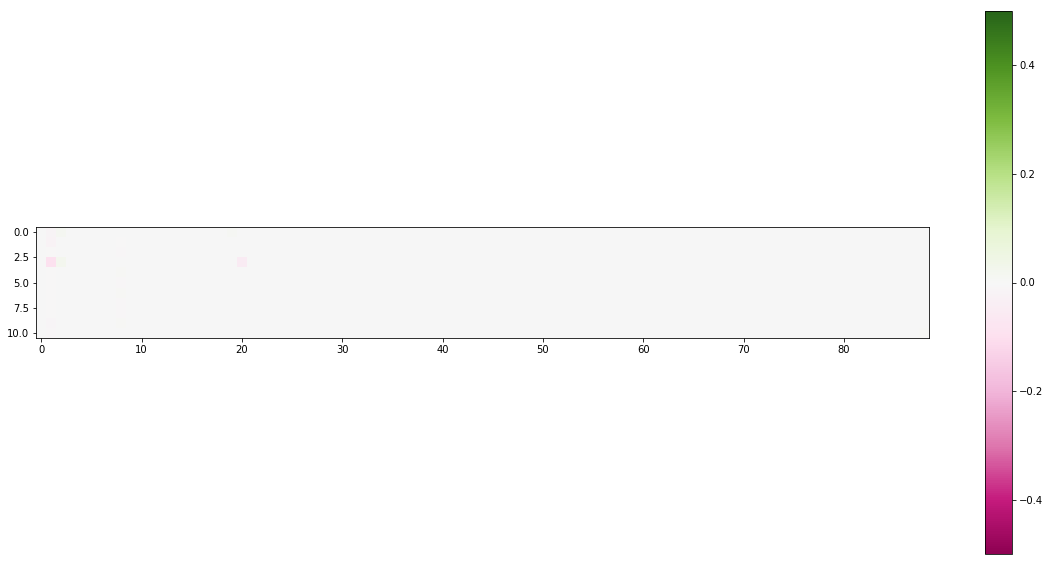

In [120]:
plt.figure(figsize=(20, 10))
plt.imshow(zero_centered_Ps['ORG'], cmap="PiYG", vmin=-0.5, vmax=0.5)
plt.colorbar()

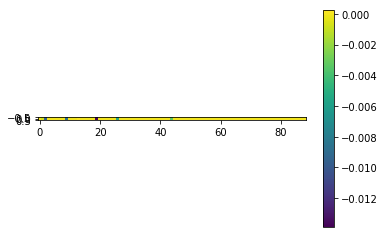

In [106]:
plt.imshow(zero_centered_Ps['PER'])
plt.colorbar()

In [60]:
a = np.array(range(10))

In [62]:
np.concatenate((a, a))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])